# The Rick and Morty API

In [113]:
# Import libraries
import pandas as pd
import requests
import json
import datetime

# S3 imports
import boto3

In [27]:
# Fetch character data from api
url = "https://rickandmortyapi.com/api/character"

response = requests.get(url)
data = response.json()

print(data.keys())

dict_keys(['info', 'results'])


In [28]:
# Analyze the info key
data['info']

{'count': 826,
 'pages': 42,
 'next': 'https://rickandmortyapi.com/api/character?page=2',
 'prev': None}

In [11]:
# Analyze the result key
print(len(data['results']))
data['results'][0]

20


{'id': 1,
 'name': 'Rick Sanchez',
 'status': 'Alive',
 'species': 'Human',
 'type': '',
 'gender': 'Male',
 'origin': {'name': 'Earth (C-137)',
  'url': 'https://rickandmortyapi.com/api/location/1'},
 'location': {'name': 'Citadel of Ricks',
  'url': 'https://rickandmortyapi.com/api/location/3'},
 'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
 'episode': ['https://rickandmortyapi.com/api/episode/1',
  'https://rickandmortyapi.com/api/episode/2',
  'https://rickandmortyapi.com/api/episode/3',
  'https://rickandmortyapi.com/api/episode/4',
  'https://rickandmortyapi.com/api/episode/5',
  'https://rickandmortyapi.com/api/episode/6',
  'https://rickandmortyapi.com/api/episode/7',
  'https://rickandmortyapi.com/api/episode/8',
  'https://rickandmortyapi.com/api/episode/9',
  'https://rickandmortyapi.com/api/episode/10',
  'https://rickandmortyapi.com/api/episode/11',
  'https://rickandmortyapi.com/api/episode/12',
  'https://rickandmortyapi.com/api/episode/13',
  'htt

In [35]:
# Function to write data to a dataframe
from tqdm import tqdm
import time

all_data = []
page = 1

# Initialize the progress bar
with tqdm(desc="Extracting Pages", ncols=100, ascii=True) as pbar:
    while True:
        # Update the progress bar description with the current page
        pbar.set_description(f"Extracting Page {page}")
        
        # Make the API request
        response = requests.get(f'https://rickandmortyapi.com/api/character?page={str(page)}')
        data = response.json().get('results', [])
        
        # Collect data
        all_data.extend(data)
        
        # Update the progress bar (increment by 1 page)
        pbar.update(1)
        
        # Check if there is a next page
        if response.json().get('info', {}).get('next') is not None:
            page += 1
        else:
            break

    print('Data successfully extracted!')

Extracting Page 42: : 42it [00:22,  1.88it/s]

Data succedssfully extracted!


In [68]:
# Load data to dataframe
characters_df = pd.DataFrame(all_data)

# Shape of df
print(characters_df.shape)

# Ivestigate the dataframe
characters_df.head()

(826, 12)


,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z


In [40]:
characters_df.iloc[0]['origin'].get('name')

'Earth (C-137)'

In [54]:
characters_df.iloc[1]['episode']

['https://rickandmortyapi.com/api/episode/1',
 'https://rickandmortyapi.com/api/episode/2',
 'https://rickandmortyapi.com/api/episode/3',
 'https://rickandmortyapi.com/api/episode/4',
 'https://rickandmortyapi.com/api/episode/5',
 'https://rickandmortyapi.com/api/episode/6',
 'https://rickandmortyapi.com/api/episode/7',
 'https://rickandmortyapi.com/api/episode/8',
 'https://rickandmortyapi.com/api/episode/9',
 'https://rickandmortyapi.com/api/episode/10',
 'https://rickandmortyapi.com/api/episode/11',
 'https://rickandmortyapi.com/api/episode/12',
 'https://rickandmortyapi.com/api/episode/13',
 'https://rickandmortyapi.com/api/episode/14',
 'https://rickandmortyapi.com/api/episode/15',
 'https://rickandmortyapi.com/api/episode/16',
 'https://rickandmortyapi.com/api/episode/17',
 'https://rickandmortyapi.com/api/episode/18',
 'https://rickandmortyapi.com/api/episode/19',
 'https://rickandmortyapi.com/api/episode/20',
 'https://rickandmortyapi.com/api/episode/21',
 'https://rickandmorty

## Data Cleaning

In [69]:
# Clean the origin column
import re

# Extract origin name and loaction name
characters_df['origin_name'] = characters_df['origin'].apply(lambda x: x['name'])
characters_df['location_name'] = characters_df['location'].apply(lambda x: x['name'])

# Extract 'origin id' with conditional check
def extract_id(url):
    if url:
        match = re.search(r'/(\d+)$', url)
        return match.group(1) if match else None
    return None

# Extract origin, location
characters_df['origin_id'] = characters_df['origin'].apply(lambda x:  extract_id(x['url']) if x else None)
characters_df['location_id'] = characters_df['origin'].apply(lambda x:  extract_id(x['url']) if x else None)


# Function to extract the last digit (episode id) from each URL
def extract_episode_numbers(episode_list):
    if episode_list:
        return [re.search(r'/(\d+)$', url).group(1) for url in episode_list if re.search(r'/(\d+)$', url)]
    return []

# Apply the function to the episodes column
characters_df['episode_ids'] = characters_df['episode'].apply(extract_episode_numbers)
characters_df['total_episodes'] = characters_df['episode_ids'].apply(len)

# Drop origin and location columns
characters_df = characters_df.drop(['origin', 'location', 'episode'], axis=1, )

characters_df.head()

,id,name,status,species,type,gender,image,url,created,origin_name,location_name,origin_id,location_id,episode_ids,total_episodes
0,1,Rick Sanchez,Alive,Human,,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z,Earth (C-137),Citadel of Ricks,1,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",51
1,2,Morty Smith,Alive,Human,,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z,unknown,Citadel of Ricks,None,None,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",51
2,3,Summer Smith,Alive,Human,,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z,Earth (Replacement Dimension),Earth (Replacement Dimension),20,20,"[6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 1...",42
3,4,Beth Smith,Alive,Human,,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z,Earth (Replacement Dimension),Earth (Replacement Dimension),20,20,"[6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 2...",42
4,5,Jerry Smith,Alive,Human,,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z,Earth (Replacement Dimension),Earth (Replacement Dimension),20,20,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 1...",39


In [90]:
characters_df.columns

Index(['id', 'name', 'status', 'species', 'type', 'gender', 'image', 'url',
       'created', 'origin_name', 'location_name', 'origin_id', 'location_id',
       'episode_ids', 'total_episodes'],
      dtype='object')

In [96]:
# Rearrange the columns
characters_df = characters_df[characters_df.columns[[0, 1, 2, 3, 4, 5, 9, 11, 
                                                    10, 12, 13, 14, 8, 7, 6]]]

# Drop the type column(empty)
characters_df = characters_df.drop('type', axis=1)

characters_df.head()

,id,name,status,species,gender,created,image,url,location_name,origin_id,origin_name,episode_ids,total_episodes,location_id
0,1,Rick Sanchez,Alive,Human,Male,2017-11-04T18:48:46.250Z,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/1,Citadel of Ricks,1,Earth (C-137),"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",51,1
1,2,Morty Smith,Alive,Human,Male,2017-11-04T18:50:21.651Z,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/2,Citadel of Ricks,None,unknown,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",51,None
2,3,Summer Smith,Alive,Human,Female,2017-11-04T19:09:56.428Z,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/3,Earth (Replacement Dimension),20,Earth (Replacement Dimension),"[6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 1...",42,20
3,4,Beth Smith,Alive,Human,Female,2017-11-04T19:22:43.665Z,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/4,Earth (Replacement Dimension),20,Earth (Replacement Dimension),"[6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 2...",42,20
4,5,Jerry Smith,Alive,Human,Male,2017-11-04T19:26:56.301Z,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/5,Earth (Replacement Dimension),20,Earth (Replacement Dimension),"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 1...",39,20


## EDA - Exploratory Data Analysis

In [110]:
# import visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set default figure size for Seaborn plots
sns.set_context("notebook", rc={"figure.figsize": (12, 6)})

In [111]:
# Status value count
status = characters_df['status'].value_counts().head()
status

Alive      439
Dead       287
unknown    100
Name: status, dtype: int64

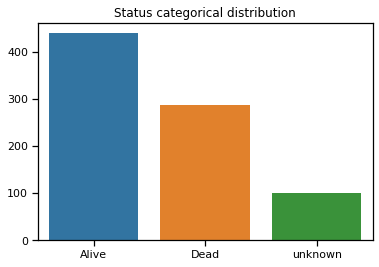

In [112]:
# Plot a bar plot showing the status
ax = sns.barplot(x=status.index, y=status.values)

# Set the xtick labels
ax.set_xticklabels(status.index)
ax.set_title('Status categorical distribution');

### Top 10 charcater episode appearances

In [89]:
# Sort the DataFrame by 'total_episodes' in descending order
sorted_df = characters_df.sort_values(by='total_episodes', ascending=False)

# Select the top 10 characters
top_10_characters = sorted_df.head(10)

# Display the result
top_10_characters[['name', 'total_episodes']]


,name,total_episodes
0,Rick Sanchez,51
1,Morty Smith,51
2,Summer Smith,42
3,Beth Smith,42
4,Jerry Smith,39
179,Jessica,12
239,Mr. Goldenfold,10
37,Beth Smith,8
328,Snuffles (Snowball),8
180,Jessica's Friend,8


## Load data to AWS S3 bucket

In [127]:
import os
from io import StringIO

#Creating Session With Boto3.
session = boto3.Session(
aws_access_key_id=os.getenv('aws_access_key_id'),
aws_secret_access_key=os.getenv('aws_secret_access_key')
)

# Convert DataFrame to CSV string
csv_buffer = StringIO()
characters_df.to_csv(csv_buffer, index=False)

# Get current timestamp
timestamp = datetime.datetime.now()

year = str(timestamp.year)
month = str(timestamp.month).zfill(2)
day = str(timestamp.day).zfill(2)
hour = str(timestamp.hour).zfill(2)
minute = str(timestamp.minute).zfill(2)

#Creating S3 Resource From the Session.
s3 = session.resource('s3')

# Write data to s3
result = s3.meta.client.put_object(Body=csv_buffer.getvalue(), 
                                   Bucket='rick-and-morty-de',
                                   Key=f'rick_and_morty/Character/{year}/{month}/{day}/{hour}/{minute}/character.csv')

res = result.get('ResponseMetadata')

if res.get('HTTPStatusCode') == 200:
    print('File Uploaded Succesfully')
else:
    print('File Not Uploaded')

File Uploaded Succesfully


In [114]:
t = datetime.datetime.now()

In [115]:
t

datetime.datetime(2024, 8, 19, 23, 14, 3, 107652)

In [120]:
str(t.month).zfill(2)

'08'